# **TF-IDF**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Load data
train_data = pd.read_csv("/content/drive/My Drive/NLP PROJECT/Dataset/train.csv")

# Function to clean text
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"
                               u"\U00002702-\U000027B0"
                               u"\U0001F680-\U0001F6FF"
                               u"\U0001F300-\U0001F5FF"
                               u"\U0001F1E0-\U0001F1FF"
                               u"\U000024C2-\U0001F251"
                               "]+")
    text = emoji_pattern.sub(r'', text)
    text = re.sub(r'@\S+', ' ', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z]+', ' ', text)
    text = text.lower()
    nltk.download('stopwords')
    text = [word for word in text.split() if word not in stopwords.words('english')]
    nltk.download('wordnet')
    text = [WordNetLemmatizer().lemmatize(word) for word in text]
    text = ' '.join(word for word in text)
    return text

# Apply cleaning
train_data['clean text'] = train_data['text'].apply(clean_text)

# Drop unnecessary columns
df_train = train_data.drop(columns=['id', 'keyword', 'location', 'text'])

# Split data
X = df_train['clean text']
y = df_train['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize text data
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Define models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Naïve Bayes': GaussianNB(),
    'SVM': SVC(kernel='linear', random_state=42, probability=True)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_tfidf.toarray(), y_train)
    y_pred = model.predict(X_test_tfidf.toarray())
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_tfidf.toarray())[:, 1])
    results[name] = {'accuracy': accuracy, 'roc_auc': roc_auc}
    print(f'{name} - Accuracy: {accuracy:.2f}, ROC AUC: {roc_auc:.2f}')
    print(classification_report(y_test, y_pred))

# Print results
print("Summary of model performances:")
for name, metrics in results.items():
    print(f"{name}: Accuracy = {metrics['accuracy']:.2f}, ROC AUC = {metrics['roc_auc']:.2f}")


Streaming output truncated to the last 5000 lines.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] D

Logistic Regression - Accuracy: 0.80, ROC AUC: 0.86
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       874
           1       0.82      0.69      0.75       649

    accuracy                           0.80      1523
   macro avg       0.81      0.79      0.80      1523
weighted avg       0.81      0.80      0.80      1523

Decision Tree - Accuracy: 0.72, ROC AUC: 0.73
              precision    recall  f1-score   support

           0       0.76      0.75      0.76       874
           1       0.67      0.69      0.68       649

    accuracy                           0.72      1523
   macro avg       0.72      0.72      0.72      1523
weighted avg       0.72      0.72      0.72      1523

Random Forest - Accuracy: 0.78, ROC AUC: 0.84
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       874
           1       0.76      0.71      0.73       649

    accuracy                          

# **Count Vectorizer**

In [ ]:
#importing CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
count_vectorizer = CountVectorizer(max_features=5000)

In [ ]:
X_train_count_vectorizer= count_vectorizer.fit_transform(X_train)
X_test_count_vectorizer = count_vectorizer.transform(X_test)

In [ ]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Naïve Bayes': GaussianNB(),
    'SVM': SVC(kernel='linear', random_state=42, probability=True)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_tfidf.toarray(), y_train)
    y_pred = model.predict(X_test_tfidf.toarray())
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_tfidf.toarray())[:, 1])
    results[name] = {'accuracy': accuracy, 'roc_auc': roc_auc}
    print(f'{name} - Accuracy: {accuracy:.2f}, ROC AUC: {roc_auc:.2f}')
    print(classification_report(y_test, y_pred))

# Print results
print("Summary of model performances:")
for name, metrics in results.items():
    print(f"{name}: Accuracy = {metrics['accuracy']:.2f}, ROC AUC = {metrics['roc_auc']:.2f}")

Logistic Regression - Accuracy: 0.80, ROC AUC: 0.86
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       874
           1       0.82      0.69      0.75       649

    accuracy                           0.80      1523
   macro avg       0.81      0.79      0.80      1523
weighted avg       0.81      0.80      0.80      1523

Decision Tree - Accuracy: 0.72, ROC AUC: 0.73
              precision    recall  f1-score   support

           0       0.76      0.75      0.76       874
           1       0.67      0.69      0.68       649

    accuracy                           0.72      1523
   macro avg       0.72      0.72      0.72      1523
weighted avg       0.72      0.72      0.72      1523

Random Forest - Accuracy: 0.78, ROC AUC: 0.84
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       874
           1       0.76      0.71      0.73       649

    accuracy                          


# **GLOVE**

In [ ]:


# Load GloVe embeddings
def load_glove_embeddings(glove_file_path):
    embeddings_index = {}
    with open(glove_file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = vector
    return embeddings_index

# Download and load GloVe embeddings (adjust path as necessary)
glove_file_path = "/content/drive/MyDrive/NLP PROJECT"
embeddings_index = load_glove_embeddings(glove_file_path)

# Create GloVe embeddings for text data
def text_to_glove(text, embeddings_index, embedding_dim=100):
    words = text.split()
    word_vectors = [embeddings_index.get(word) for word in words if word in embeddings_index]
    if len(word_vectors) == 0:
        return np.zeros(embedding_dim)
    return np.mean(word_vectors, axis=0)

# Convert train and test sets to GloVe embeddings
X_train_glove = np.array([text_to_glove(text, embeddings_index) for text in X_train])
X_test_glove = np.array([text_to_glove(text, embeddings_index) for text in X_test])

# Define models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Naïve Bayes': GaussianNB(),
    'SVM': SVC(kernel='linear', random_state=42, probability=True)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_glove, y_train)
    y_pred = model.predict(X_test_glove)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_glove)[:, 1])
    results[name] = {'accuracy': accuracy, 'roc_auc': roc_auc}
    print(f'{name} - Accuracy: {accuracy:.2f}, ROC AUC: {roc_auc:.2f}')
    print(classification_report(y_test, y_pred))

# Print results
print("Summary of model performances:")
for name, metrics in results.items():
    print(f"{name}: Accuracy = {metrics['accuracy']:.2f}, ROC AUC = {metrics['roc_auc']:.2f}")


IsADirectoryError: [Errno 21] Is a directory: '/content/drive/MyDrive/NLP PROJECT'

# **WORD2VEC**

In [ ]:
from gensim.models import Word2Vec



# Tokenize sentences for Word2Vec
X_train_tokens = X_train.apply(lambda x: x.split())
X_test_tokens = X_test.apply(lambda x: x.split())

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=X_train_tokens, vector_size=100, window=5, min_count=1, workers=4)

# Function to convert text to Word2Vec vectors
def get_word2vec_vector(tokens, model, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0
    for word in tokens:
        try:
            vec += model.wv[word].reshape((1, size))
            count += 1
        except KeyError:
            continue
    if count != 0:
        vec /= count
    return vec

# Convert text data to Word2Vec vectors
X_train_word2vec = np.concatenate([get_word2vec_vector(tokens, word2vec_model, 100) for tokens in X_train_tokens])
X_test_word2vec = np.concatenate([get_word2vec_vector(tokens, word2vec_model, 100) for tokens in X_test_tokens])

# Define models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Naïve Bayes': GaussianNB(),
    'SVM': SVC(kernel='linear', random_state=42, probability=True)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_word2vec, y_train)
    y_pred = model.predict(X_test_word2vec)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_word2vec)[:, 1])
    results[name] = {'accuracy': accuracy, 'roc_auc': roc_auc}
    print(f'{name} - Accuracy: {accuracy:.2f}, ROC AUC: {roc_auc:.2f}')
    print(classification_report(y_test, y_pred))

# Print results
print("Summary of model performances:")
for name, metrics in results.items():
    print(f"{name}: Accuracy = {metrics['accuracy']:.2f}, ROC AUC = {metrics['roc_auc']:.2f}")


Logistic Regression - Accuracy: 0.57, ROC AUC: 0.59
              precision    recall  f1-score   support

           0       0.58      0.88      0.70       874
           1       0.48      0.14      0.22       649

    accuracy                           0.57      1523
   macro avg       0.53      0.51      0.46      1523
weighted avg       0.54      0.57      0.50      1523

Decision Tree - Accuracy: 0.61, ROC AUC: 0.61
              precision    recall  f1-score   support

           0       0.67      0.63      0.65       874
           1       0.54      0.58      0.56       649

    accuracy                           0.61      1523
   macro avg       0.60      0.61      0.60      1523
weighted avg       0.61      0.61      0.61      1523

Random Forest - Accuracy: 0.70, ROC AUC: 0.73
              precision    recall  f1-score   support

           0       0.69      0.88      0.77       874
           1       0.74      0.47      0.58       649

    accuracy                          

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **BAGG OF WORDS**

In [ ]:
#Importing CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Vectorize text data using Bag of Words
count_vectorizer = CountVectorizer(max_features=5000)
X_train_bow = count_vectorizer.fit_transform(X_train)
X_test_bow = count_vectorizer.transform(X_test)

# Define models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Naïve Bayes': GaussianNB(),
    'SVM': SVC(kernel='linear', random_state=42, probability=True)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_bow.toarray(), y_train)
    y_pred = model.predict(X_test_bow.toarray())
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_bow.toarray())[:, 1])
    results[name] = {'accuracy': accuracy, 'roc_auc': roc_auc}
    print(f'{name} - Accuracy: {accuracy:.2f}, ROC AUC: {roc_auc:.2f}')
    print(classification_report(y_test, y_pred))

# Print results
print("Summary of model performances:")
for name, metrics in results.items():
    print(f"{name}: Accuracy = {metrics['accuracy']:.2f}, ROC AUC = {metrics['roc_auc']:.2f}")

Logistic Regression - Accuracy: 0.80, ROC AUC: 0.86
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       874
           1       0.80      0.72      0.76       649

    accuracy                           0.80      1523
   macro avg       0.80      0.79      0.80      1523
weighted avg       0.80      0.80      0.80      1523

Decision Tree - Accuracy: 0.73, ROC AUC: 0.73
              precision    recall  f1-score   support

           0       0.76      0.77      0.77       874
           1       0.69      0.68      0.68       649

    accuracy                           0.73      1523
   macro avg       0.73      0.73      0.73      1523
weighted avg       0.73      0.73      0.73      1523

Random Forest - Accuracy: 0.77, ROC AUC: 0.83
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       874
           1       0.76      0.69      0.72       649

    accuracy                          

# **BERT**

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
from transformers import BertTokenizer, BertModel
import torch
from joblib import dump

In [17]:
# Visualize the distribution of the labels
def visualization(train_data):
    label_counts = train_data.value_counts()
    colors = ['orange', 'green']
    plt.figure(figsize=(8, 6))
    label_counts.plot(kind='bar', color=colors)
    plt.title('Distribution of text')
    plt.xlabel('Categories')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

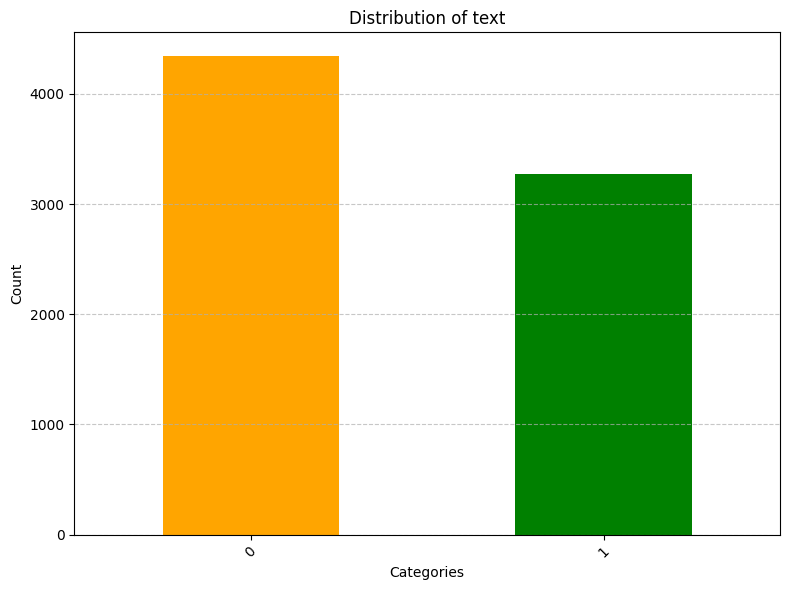

In [18]:
visualization(train_data['target'])

In [ ]:
# Load BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Function to get BERT embeddings
def tokenize_and_extract_embeddings(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

# Apply BERT embeddings
print("Extracting BERT embeddings...")
df_train['embeddings'] = df_train['clean text'].apply(tokenize_and_extract_embeddings)

# Convert embeddings and labels to numpy arrays
X = np.vstack(df_train['embeddings'].values)
y = df_train['target'].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Naïve Bayes': GaussianNB(),
    'SVM': SVC(kernel='linear', random_state=42, probability=True)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    results[name] = {'accuracy': accuracy, 'roc_auc': roc_auc}
    print(f'{name} - Accuracy: {accuracy:.2f}, ROC AUC: {roc_auc:.2f}')
    print(classification_report(y_test, y_pred))



Extracting BERT embeddings...
